In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import normalize
from sklearn.model_selection import train_test_split
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")
from matplotlib.gridspec import GridSpec #data viz


from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
from sklearn.metrics import confusion_matrix, roc_auc_score, roc_curve, classification_report, precision_recall_curve
from sklearn.model_selection import train_test_split, cross_val_score, StratifiedKFold, GridSearchCV, RandomizedSearchCV
from sklearn.preprocessing import MinMaxScaler, LabelEncoder, StandardScaler, RobustScaler
from sklearn.ensemble import AdaBoostClassifier

from sklearn.svm import SVC

In [2]:
with open("Nomao.names") as f:
    print(f.read())

The Nomao dataset 

*************************
1. Title of the Dataset:  Nomao.data

*************************
2. Sources: 

(a) Original owner of database (name / phone / snail address / email address) 
Nomao / 00 33 5 62 48 33 90 / 1 avenue Jean Rieux, 31500 Toulouse / challenge@nomao.com

(b) Donor of database (name / phone / snail address / email address) 
Laurent Candillier / - /  1 avenue Jean Rieux, 31500 Toulouse  / laurent@nomao.com 

(c) Date received (databases may change over time without name change!) 
07/02/2012 

*************************
3. Past Usage:

(a) Complete reference of article where it was described/used 

@inproceedings{nomaochallenge-ecml,
  author={Laurent Candillier and Vincent Lemaire},
  title={Design and Analysis of the Nomao Challenge - Active Learning in the Real-World},
  booktitle={Proceedings of the ALRA : Active Learning in Real-world Applications, Workshop ECML-PKDD 2012, Friday, September 28, 2012, Bristol, UK},
  year = 2012,
  pages={to appear}

In [3]:
column_names = ['id','clean_name_intersect_min','clean_name_intersect_max','clean_name_levenshtein_sim','clean_name_trigram_sim',
                'clean_name_levenshtein_term',
                'clean_name_trigram_term','clean_name_including','clean_name_equality','city_intersect_min','city_intersect_max',
                'city_levenshtein_sim','city_trigram_sim','city_levenshtein_term','city_trigram_term','city_including','city_equality'
                ,'zip_intersect_min','zip_intersect_max','zip_levenshtein_sim','zip_trigram_sim','zip_levenshtein_term',
                'zip_trigram_term','zip_including','zip_equality',
                'street_intersect_min','street_intersect_max','street_levenshtein_sim','street_trigram_sim','street_levenshtein_term',
                'street_trigram_term'
                ,'street_including','street_equality','website_intersect_min','website_intersect_max','website_levenshtein_sim','website_trigram_sim',
                'website_levenshtein_term','website_trigram_term','website_including','website_equality','countryname_intersect_min','countryname_intersect_max',
                'countryname_levenshtein_sim','countryname_trigram_sim','countryname_levenshtein_term',
                'countryname_trigram_term','countryname_including','countryname_equality','geocoderlocalityname_intersect_min','geocoderlocalityname_intersect_max',
                'geocoderlocalityname_levenshtein_sim','geocoderlocalityname_trigram_sim','geocoderlocalityname_levenshtein_term','geocoderlocalityname_trigram_term',
                'geocoderlocalityname_including','geocoderlocalityname_equality','geocoderinputaddress_intersect_min','geocoderinputaddress_intersect_max',
                'geocoderinputaddress_levenshtein_sim','geocoderinputaddress_trigram_sim','geocoderinputaddress_levenshtein_term','geocoderinputaddress_trigram_term',
                'geocoderinputaddress_including','geocoderinputaddress_equality','geocoderoutputaddress_intersect_min','geocoderoutputaddress_intersect_max',
                'geocoderoutputaddress_levenshtein_sim','geocoderoutputaddress_trigram_sim','geocoderoutputaddress_levenshtein_term','geocoderoutputaddress_trigram_term',
                'geocoderoutputaddress_including','geocoderoutputaddress_equality','geocoderpostalcodenumber_intersect_min','geocoderpostalcodenumber_intersect_max',
                'geocoderpostalcodenumber_levenshtein_sim','geocoderpostalcodenumber_trigram_sim','geocoderpostalcodenumber_levenshtein_term','geocoderpostalcodenumber_trigram_term',
                'geocoderpostalcodenumber_including','geocoderpostalcodenumber_equality','geocodercountrynamecode_intersect_min','geocodercountrynamecode_intersect_max',
                'geocodercountrynamecode_levenshtein_sim','geocodercountrynamecode_trigram_sim','geocodercountrynamecode_levenshtein_term','geocodercountrynamecode_trigram_term',
                'geocodercountrynamecode_including','geocodercountrynamecode_equality','phone_diff','phone_levenshtein','phone_trigram','phone_equality','fax_diff','fax_levenshtein',
                'fax_trigram','fax_equality','street_number_diff','street_number_levenshtein','street_number_trigram','street_number_equality','geocode_coordinates_long_diff',
                'geocode_coordinates_long_levenshtein','geocode_coordinates_long_trigram','geocode_coordinates_long_equality','geocode_coordinates_lat_diff',
                'geocode_coordinates_lat_levenshtein','geocode_coordinates_lat_trigram',
                'geocode_coordinates_lat_equality','coordinates_long_diff','coordinates_long_levenshtein','coordinates_long_trigram',
                'coordinates_long_equality','coordinates_lat_diff','coordinates_lat_levenshtein','coordinates_lat_trigram',
                'coordinates_lat_equality','geocode_coordinates_diff','coordinates_diff','label']

In [4]:
df = pd.read_csv('Nomao.data',names=column_names,low_memory=False)

In [5]:
df

,id,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_intersect_min,...,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_long_equality,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,coordinates_lat_equality,geocode_coordinates_diff,coordinates_diff,label
0,0#1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,?,...,0.75,0.5,n,0.999953002209,0.777777777778,0.461538463831,n,1.0,0.999999996702,1
1,0#2,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,s,n,?,...,0.5,0.307692319155,n,0.999982921892,0.538461538462,0.4375,n,1.0,0.999999962459,1
2,0#3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,?,...,0.666666666667,0.461538463831,n,0.999992600055,0.8,0.666666686535,n,1.0,0.999999999653,1
3,4#5,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,s,n,1,...,0.5,0.285714298487,n,0.998604948886,0.555555555556,0.384615391493,n,0.999999947284,0.999994124065,1
4,6#7,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,n,n,?,...,?,?,m,?,?,?,m,1.0,?,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,505442#638600,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,0,...,0.222222222222,0.190476194024,n,0.999685099194,0.722222222222,0.272727280855,n,0.999996735202,0.999995759568,-1
34461,40886#102945,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,1,...,0.777777777778,0.300000011921,n,0.999745065008,0.388888888889,0.333333343267,n,0.999999932864,0.999999929934,-1
34462,710009#742141,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,?,...,?,?,m,?,?,?,m,1.0,?,1
34463,319905#884876,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,?,...,?,?,m,?,?,?,m,0.999130880032,?,1


In [6]:
question_mark_counts_per_column = (df == '?').sum()

In [7]:
question_mark_counts_per_column.to_csv('missing2.csv')

In [8]:
df.replace('?', np.nan, inplace=True)

In [9]:
df

,id,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_intersect_min,...,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_long_equality,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,coordinates_lat_equality,geocode_coordinates_diff,coordinates_diff,label
0,0#1,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,NaN,...,0.75,0.5,n,0.999953002209,0.777777777778,0.461538463831,n,1.0,0.999999996702,1
1,0#2,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,s,n,NaN,...,0.5,0.307692319155,n,0.999982921892,0.538461538462,0.4375,n,1.0,0.999999962459,1
2,0#3,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,s,s,NaN,...,0.666666666667,0.461538463831,n,0.999992600055,0.8,0.666666686535,n,1.0,0.999999999653,1
3,4#5,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,s,n,1,...,0.5,0.285714298487,n,0.998604948886,0.555555555556,0.384615391493,n,0.999999947284,0.999994124065,1
4,6#7,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,n,n,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,1.0,NaN,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,505442#638600,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,n,n,0,...,0.222222222222,0.190476194024,n,0.999685099194,0.722222222222,0.272727280855,n,0.999996735202,0.999995759568,-1
34461,40886#102945,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,n,n,1,...,0.777777777778,0.300000011921,n,0.999745065008,0.388888888889,0.333333343267,n,0.999999932864,0.999999929934,-1
34462,710009#742141,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,n,n,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,1.0,NaN,1
34463,319905#884876,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,n,n,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,0.999130880032,NaN,1


In [10]:
id_column = df['id']
labels = df['label']
if 'id' in df.columns:
    # Remove the 'id' column and update the DataFrame in-place
    df.drop(columns=['id'], inplace=True)

In [11]:
df.head()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_intersect_min,city_intersect_max,...,coordinates_long_levenshtein,coordinates_long_trigram,coordinates_long_equality,coordinates_lat_diff,coordinates_lat_levenshtein,coordinates_lat_trigram,coordinates_lat_equality,geocode_coordinates_diff,coordinates_diff,label
0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,NaN,NaN,...,0.75,0.5,n,0.999953002209,0.777777777778,0.461538463831,n,1.0,0.999999996702,1
1,1.0,0.75,0.857143,0.857143,0.894737,0.947368,s,n,NaN,NaN,...,0.5,0.307692319155,n,0.999982921892,0.538461538462,0.4375,n,1.0,0.999999962459,1
2,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,NaN,NaN,...,0.666666666667,0.461538463831,n,0.999992600055,0.8,0.666666686535,n,1.0,0.999999999653,1
3,1.0,0.75,0.857143,0.857143,0.842105,0.833333,s,n,1,1,...,0.5,0.285714298487,n,0.998604948886,0.555555555556,0.384615391493,n,0.999999947284,0.999994124065,1
4,0.0,0.00,0.250000,0.000000,0.250000,0.000000,n,n,NaN,NaN,...,NaN,NaN,m,NaN,NaN,NaN,m,1.0,NaN,1


In [12]:
# List of column names to be removed ( more than 60 % datapoints are missing)
columns_to_remove = ['city_intersect_min','city_intersect_max','city_levenshtein_sim','city_trigram_sim','city_levenshtein_term',
                     'city_trigram_term','zip_intersect_max','zip_levenshtein_sim',
                     'zip_trigram_sim','zip_levenshtein_term','zip_trigram_term','street_intersect_min','street_intersect_max',
                     'street_levenshtein_sim','street_trigram_sim','street_levenshtein_term',
                'street_trigram_term','website_intersect_min','website_intersect_max','website_levenshtein_sim','website_trigram_sim',
                     'website_levenshtein_term','website_trigram_term','countryname_intersect_min','countryname_intersect_max',
                     'countryname_levenshtein_sim','countryname_trigram_sim','countryname_levenshtein_term','phone_diff',
                     'phone_levenshtein','phone_trigram','fax_diff','fax_levenshtein','fax_trigram','coordinates_long_diff','coordinates_long_levenshtein',
                     'coordinates_long_trigram','coordinates_lat_diff','coordinates_lat_levenshtein','coordinates_lat_trigram','coordinates_diff']

In [13]:
df.drop(columns=columns_to_remove, inplace=True)

In [14]:
df.head()

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,clean_name_including,clean_name_equality,city_including,city_equality,...,geocode_coordinates_long_trigram,geocode_coordinates_long_equality,geocode_coordinates_lat_diff,geocode_coordinates_lat_levenshtein,geocode_coordinates_lat_trigram,geocode_coordinates_lat_equality,coordinates_long_equality,coordinates_lat_equality,geocode_coordinates_diff,label
0,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,m,m,...,1.0,s,1.0,1.0,1.0,s,n,n,1.0,1
1,1.0,0.75,0.857143,0.857143,0.894737,0.947368,s,n,m,m,...,1.0,s,1.0,1.0,1.0,s,n,n,1.0,1
2,1.0,1.00,1.000000,1.000000,1.000000,1.000000,s,s,m,m,...,1.0,s,1.0,1.0,1.0,s,n,n,1.0,1
3,1.0,0.75,0.857143,0.857143,0.842105,0.833333,s,n,s,s,...,0.333333343267,n,0.999961801459,0.5,0.29411765933,n,n,n,0.999999947284,1
4,0.0,0.00,0.250000,0.000000,0.250000,0.000000,n,n,m,m,...,1.0,s,1.0,1.0,1.0,s,m,m,1.0,1


In [15]:
df.to_csv('deleting.csv')

In [16]:
df.dtypes.to_csv('dtype.csv')

In [17]:
# Apply one-hot encoding to the 'category' column
df_encoded = pd.get_dummies(df, columns=['clean_name_including','clean_name_equality','city_including','city_equality',
                                         'zip_including','zip_equality','street_including','street_equality','website_including',
                                         'website_equality','countryname_including',
                                         'countryname_equality','geocoderinputaddress_including','geocoderlocalityname_including',
                                         'geocoderlocalityname_equality','geocoderinputaddress_equality',
                                        'geocoderoutputaddress_including','geocoderoutputaddress_equality',
                                         'geocoderpostalcodenumber_including','geocoderpostalcodenumber_equality',
                                         'geocodercountrynamecode_including','geocodercountrynamecode_equality',
                                         'phone_equality','fax_equality','street_number_equality','geocode_coordinates_long_equality',
                                         'geocode_coordinates_lat_equality','coordinates_long_equality','coordinates_lat_equality'
                                        ])

In [18]:
df_encoded.to_csv('r3.csv')

In [19]:
df_encoded

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,zip_intersect_min,countryname_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,...,geocode_coordinates_long_equality_s,geocode_coordinates_lat_equality_m,geocode_coordinates_lat_equality_n,geocode_coordinates_lat_equality_s,coordinates_long_equality_m,coordinates_long_equality_n,coordinates_long_equality_s,coordinates_lat_equality_m,coordinates_lat_equality_n,coordinates_lat_equality_s
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1,1,...,True,False,False,True,False,True,False,False,True,False
1,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,NaN,NaN,1,1,...,True,False,False,True,False,True,False,False,True,False
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,1,1,...,True,False,False,True,False,True,False,False,True,False
3,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,1,NaN,1,1,...,False,False,True,False,False,True,False,False,True,False
4,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,NaN,NaN,1,1,...,True,False,False,True,True,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,0,NaN,0,0,...,False,False,True,False,False,True,False,False,True,False
34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,NaN,NaN,1,1,...,False,False,True,False,False,True,False,False,True,False
34462,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,NaN,NaN,1,1,...,True,False,False,True,True,False,False,True,False,False
34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,NaN,NaN,0,0,...,False,False,True,False,True,False,False,True,False,False


In [20]:
df_encoded.dtypes.to_csv('dtype2.csv')

In [21]:
missing_values2 = df_encoded.isnull().sum()

In [22]:
missing_values2.to_csv('m4.csv')

# Missing value impuation usig KNN Imputer

In [23]:
from sklearn.impute import KNNImputer

# Create a KNNImputer instance for handling missing values
imputer = KNNImputer(n_neighbors=5)

# Fit and transform the dataset to impute missing values
df_imputed = pd.DataFrame(imputer.fit_transform(df_encoded), columns=df_encoded.columns)

In [24]:
df_imputed

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,zip_intersect_min,countryname_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,...,geocode_coordinates_long_equality_s,geocode_coordinates_lat_equality_m,geocode_coordinates_lat_equality_n,geocode_coordinates_lat_equality_s,coordinates_long_equality_m,coordinates_long_equality_n,coordinates_long_equality_s,coordinates_lat_equality_m,coordinates_lat_equality_n,coordinates_lat_equality_s
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.4,0.553333,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,0.8,0.700000,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.4,0.553333,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,1.0,0.857143,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.6,1.000000,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34460,0.333333,0.333333,0.455026,0.352941,0.222222,0.125000,0.0,0.443275,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,1.0,0.622222,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34462,0.000000,0.000000,0.312500,0.037037,0.200000,0.027027,0.2,0.757143,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,1.0,0.311765,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


In [25]:
#df_imputed['labels'] = label

In [26]:
df_imputed.to_csv('imputed_data.csv')

In [27]:
missing_values3 = df_imputed.isnull().sum()

In [28]:
missing_values3

clean_name_intersect_min       0
clean_name_intersect_max       0
clean_name_levenshtein_sim     0
clean_name_trigram_sim         0
clean_name_levenshtein_term    0
                              ..
coordinates_long_equality_n    0
coordinates_long_equality_s    0
coordinates_lat_equality_m     0
coordinates_lat_equality_n     0
coordinates_lat_equality_s     0
Length: 134, dtype: int64

In [29]:
#missing_values3.to_csv('i2.csv')

# Outlier detection


In [30]:
# Scaling features before outlier detection
ss = StandardScaler()
arr_sca = ss.fit_transform(df_imputed)
df_sca = pd.DataFrame(arr_sca, columns = df_imputed.columns)

In [31]:
# First check whether the data is normally distributed or not in order to decide which method to apply
from scipy import stats
k2, p = stats.normaltest(df_sca)

In [32]:
p

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.])

As none of the features are normally distributed we can say that the data as a whole is not normally distributed.

In [33]:
# Using the above test we can infer that since the columns are not from normal distribution we should apply z-score method with median instead of mean

outliers = []
median = df_sca.median()
stdD = df_sca.std()
zScore = (df_sca - median)/stdD
zScoreArr = zScore.to_numpy()
for i in range(len(zScoreArr)):
    for j in zScoreArr[i]:
        if(np.abs(j)>5):
            outliers.append(i)
            break
len(outliers)

6364

In [34]:
df_outlier_removed = df_imputed.drop(outliers)
label = labels.drop(outliers)
df_outlier_removed

,clean_name_intersect_min,clean_name_intersect_max,clean_name_levenshtein_sim,clean_name_trigram_sim,clean_name_levenshtein_term,clean_name_trigram_term,zip_intersect_min,countryname_trigram_term,geocoderlocalityname_intersect_min,geocoderlocalityname_intersect_max,...,geocode_coordinates_long_equality_s,geocode_coordinates_lat_equality_m,geocode_coordinates_lat_equality_n,geocode_coordinates_lat_equality_s,coordinates_long_equality_m,coordinates_long_equality_n,coordinates_long_equality_s,coordinates_lat_equality_m,coordinates_lat_equality_n,coordinates_lat_equality_s
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.4,0.553333,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
1,1.000000,0.750000,0.857143,0.857143,0.894737,0.947368,0.8,0.700000,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
2,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.4,0.553333,1.0,1.0,...,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0
3,1.000000,0.750000,0.857143,0.857143,0.842105,0.833333,1.0,0.857143,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
4,0.000000,0.000000,0.250000,0.000000,0.250000,0.000000,0.6,1.000000,1.0,1.0,...,1.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
34458,0.000000,0.000000,0.000000,0.000000,0.111111,0.000000,0.6,0.816667,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
34459,0.333333,0.250000,0.401099,0.285714,0.285714,0.116279,0.4,0.705634,1.0,1.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
34461,0.000000,0.000000,0.041667,0.000000,0.142857,0.000000,1.0,0.622222,1.0,1.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
34463,0.500000,0.200000,0.414966,0.309524,0.312500,0.179487,1.0,0.311765,0.0,0.0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0


# Hypothesis Testing

In [35]:
data_columns = list(df_outlier_removed.columns)
data_columns

['clean_name_intersect_min',
 'clean_name_intersect_max',
 'clean_name_levenshtein_sim',
 'clean_name_trigram_sim',
 'clean_name_levenshtein_term',
 'clean_name_trigram_term',
 'zip_intersect_min',
 'countryname_trigram_term',
 'geocoderlocalityname_intersect_min',
 'geocoderlocalityname_intersect_max',
 'geocoderlocalityname_levenshtein_sim',
 'geocoderlocalityname_trigram_sim',
 'geocoderlocalityname_levenshtein_term',
 'geocoderlocalityname_trigram_term',
 'geocoderinputaddress_intersect_min',
 'geocoderinputaddress_intersect_max',
 'geocoderinputaddress_levenshtein_sim',
 'geocoderinputaddress_trigram_sim',
 'geocoderinputaddress_levenshtein_term',
 'geocoderinputaddress_trigram_term',
 'geocoderoutputaddress_intersect_min',
 'geocoderoutputaddress_intersect_max',
 'geocoderoutputaddress_levenshtein_sim',
 'geocoderoutputaddress_trigram_sim',
 'geocoderoutputaddress_levenshtein_term',
 'geocoderoutputaddress_trigram_term',
 'geocoderpostalcodenumber_intersect_min',
 'geocoderpostal

Z-test for population-mean v/s sample-mean

In [36]:
from statsmodels.stats import weightstats as stests

zdata = df_outlier_removed.loc[:, 'geocode_coordinates_long_trigram']

zdata_mean = zdata.mean()
print(zdata_mean)

zdata_std = zdata.std()
print(zdata_std)

0.6280694061207863
0.36757052468056806


In [37]:
sample_size = 10000
zdata_sample = zdata.sample(n=sample_size)

zdata_sample_mean = zdata_sample.mean()

to_check_population_mean = 0.6

# Null hypothesis is that mean = 0.6

# Alternate hypothesis is tha mean > 0.6

In [38]:
z_test_stat = (zdata_sample_mean - to_check_population_mean)/(zdata_std/np.sqrt(sample_size))
print("z-test statistic: ", z_test_stat)

if(z_test_stat > 1.64):
  print("Reject the Null hypothesis")
else:
  print("Do not reject the Null Hypothesis")

z-test statistic:  7.569039959335618
Reject the Null hypothesis


# Dimensionality reduction

In [39]:
X =  df_outlier_removed.drop('label',axis = 1)

In [40]:
from sklearn.preprocessing import StandardScaler
X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=0.90)
X_pca_scaled = pca.fit_transform(X_scaled)

In [41]:
print('Principal components count: ', pca.n_components_)

Principal components count:  19


In [42]:
pca.explained_variance_ratio_

array([0.23272393, 0.11383278, 0.09695325, 0.07542305, 0.06113659,
       0.04652359, 0.04230117, 0.03615834, 0.03200741, 0.02717047,
       0.02066785, 0.01920654, 0.0175413 , 0.01748339, 0.01436796,
       0.01383203, 0.01340925, 0.01290005, 0.0110349 ])

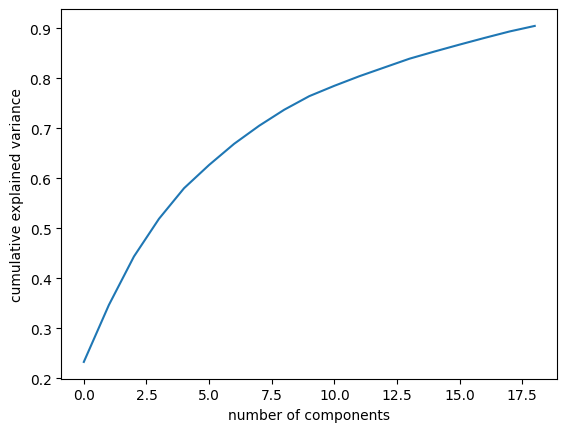

In [43]:
#Explained variance plot
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [44]:
print(X_pca_scaled.shape)

(28101, 19)


In [45]:
y = df_outlier_removed['label']

In [46]:
# Train test split prior to PCA
X_train, X_test, y_train, y_test = train_test_split(df_outlier_removed,label,test_size=0.2,random_state=22)

# ML Models

In [47]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

# Random Forest Classification Model

In [48]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X_pca_scaled,label,test_size=0.2,random_state=22,stratify= label)
rfc_1 = RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=0)
rfc_1.fit(X_train, y_train)
y_pred = rfc_1.predict(X_test)
print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.9395125422522683


In [49]:
y_pred_train = rfc_1.predict(X_train)
y_pred_train

array([ 1, -1,  1, ...,  1,  1,  1], dtype=int64)

In [50]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9406


In [51]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(rfc_1.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(rfc_1.score(X_test, y_test)))

Training set score: 0.9406
Test set score: 0.9395


In [52]:
predict_proba = pd.DataFrame(rfc_1.predict_proba(X_test), columns=['predict_proba_-1', 'predict_proba_1'])
predict_proba

,predict_proba_-1,predict_proba_1
0,0.782093,0.217907
1,0.204512,0.795488
2,0.825863,0.174137
3,0.567653,0.432347
4,0.137900,0.862100
...,...,...
5616,0.071395,0.928605
5617,0.769050,0.230950
5618,0.100261,0.899739
5619,0.048950,0.951050


# confusion Matrix

In [53]:
# View confusion matrix for test data and predictions
cm =confusion_matrix(y_test, y_pred)
cm

array([[1315,  256],
       [  84, 3966]], dtype=int64)

<Axes: >

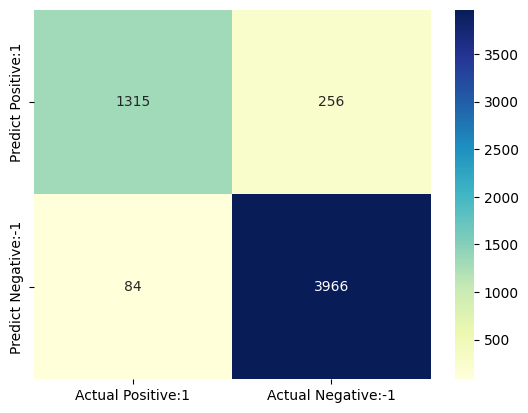

In [54]:
# visualize confusion matrix with seaborn heatmap
import seaborn as sns

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:-1'], 
                                 index=['Predict Positive:1', 'Predict Negative:-1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [55]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.94      0.84      0.89      1571
           1       0.94      0.98      0.96      4050

    accuracy                           0.94      5621
   macro avg       0.94      0.91      0.92      5621
weighted avg       0.94      0.94      0.94      5621



In [56]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[-1,-1])

print('\nFalse Positives(FP) = ', cm[0,-1])

print('\nFalse Negatives(FN) = ', cm[-1,0])

Confusion matrix

 [[1315  256]
 [  84 3966]]

True Positives(TP) =  1315

True Negatives(TN) =  3966

False Positives(FP) =  256

False Negatives(FN) =  84


In [57]:
TP = cm[0,0]
TN = cm[-1,-1]
FP = cm[0,-1]
FN = cm[-1,0]

In [58]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9395


In [59]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8370


In [60]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9400


In [61]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9081528632387957

In [62]:
cm = confusion_matrix(y_test, y_pred)
predicted_probab_log = rfc_1.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

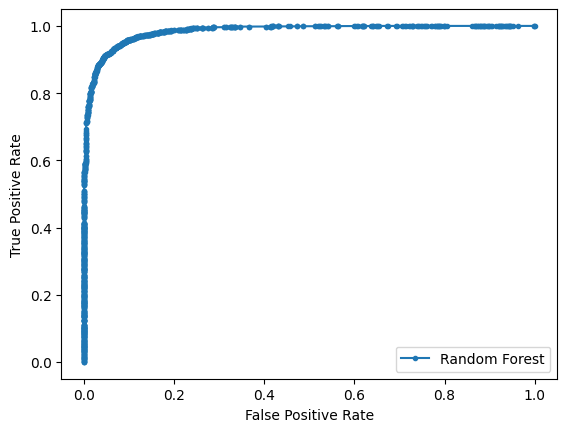

In [63]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='Random Forest')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# AUC-ROC Curve

In [64]:
rf_model=RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=0)
rf_model.fit(X_train,y_train)

RandomForestClassifier(max_depth=5, n_jobs=-1, random_state=0)

In [65]:
y_prob = rf_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, -1) # This will threshold the probabilities to give class predictions.
rf_model.score(X_test, y_pred)

1.0

In [66]:
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9081528632387957

In [67]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9838555296225571

Text(0.5, 0, 'False Positive Rate')

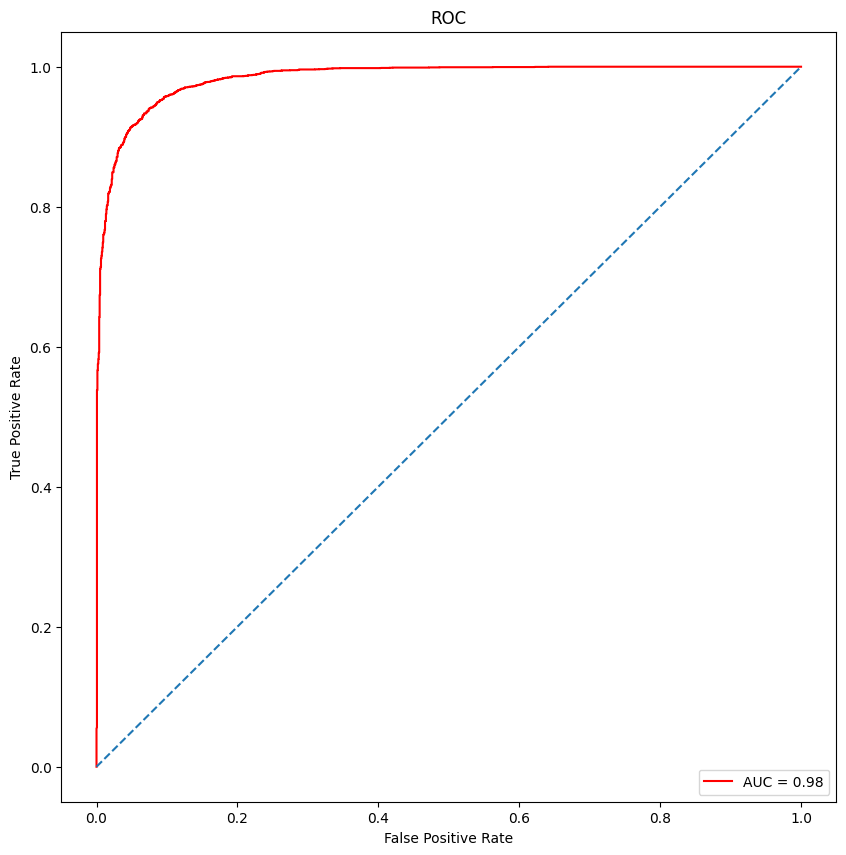

In [68]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [69]:
# Check coef
#rfc_1.feature_importances_

In [70]:
# Get the coef's into a dictionary
#feature_dict = dict(zip(df.columns, list(rfc_1.feature_importances_)))
#feature_dict

In [71]:
# Visualize feature importance
#feature_df = pd.DataFrame(feature_dict, index=[0])
#feature_df.T.plot.bar(title="Feature Importance", legend=False, figsize=(80, 10))
#plt.xticks(rotation = 360)
#plt.show()

# Logistic Regreesion

In [72]:
from sklearn.linear_model import LogisticRegression
lrc = LogisticRegression(random_state=0)
lrc.fit(X_train, y_train)
y_pred = lrc.predict(X_test)
print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.937733499377335


In [73]:
y_pred_train = lrc.predict(X_train)
y_pred_train

array([ 1, -1,  1, ...,  1,  1,  1], dtype=int64)

In [74]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9328


In [75]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(lrc.score(X_train, y_train)))
print('Test set score: {:.4f}'.format(lrc.score(X_test, y_test)))

Training set score: 0.9328
Test set score: 0.9377


In [76]:
predict_proba = pd.DataFrame(lrc.predict_proba(X_test), columns=['predict_proba_-1', 'predict_proba_1'])
predict_proba

,predict_proba_-1,predict_proba_1
0,0.853034,0.146966
1,0.334285,0.665715
2,0.989920,0.010080
3,0.932132,0.067868
4,0.041848,0.958152
...,...,...
5616,0.006523,0.993477
5617,0.924727,0.075273
5618,0.006066,0.993934
5619,0.002427,0.997573


# Confusion Matrix

In [77]:
# View confusion matrix for test data and predictions
cm =confusion_matrix(y_test, y_pred)
cm

array([[1387,  184],
       [ 166, 3884]], dtype=int64)

<Axes: >

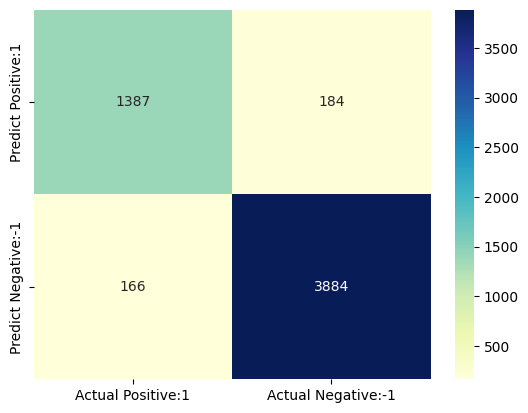

In [78]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:-1'], 
                                 index=['Predict Positive:1', 'Predict Negative:-1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [79]:
# View the classification report for test data and predictions
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.89      0.88      0.89      1571
           1       0.95      0.96      0.96      4050

    accuracy                           0.94      5621
   macro avg       0.92      0.92      0.92      5621
weighted avg       0.94      0.94      0.94      5621



In [80]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[-1,-1])

print('\nFalse Positives(FP) = ', cm[0,-1])

print('\nFalse Negatives(FN) = ', cm[-1,0])

Confusion matrix

 [[1387  184]
 [ 166 3884]]

True Positives(TP) =  1387

True Negatives(TN) =  3884

False Positives(FP) =  184

False Negatives(FN) =  166


In [81]:
TP = cm[0,0]
TN = cm[-1,-1]
FP = cm[0,-1]
FN = cm[-1,0]

In [82]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9377


In [83]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8829


In [84]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8931


In [85]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9209447469960944

In [86]:
cm = confusion_matrix(y_test, y_pred)
predicted_probab_log = lrc.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

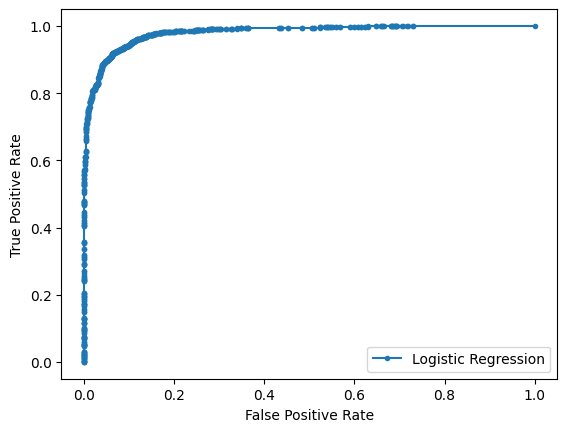

In [87]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='Logistic Regression')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

# AUC-ROC Curve

In [88]:
lr_model=LogisticRegression()
lr_model.fit(X_train,y_train)

LogisticRegression()

In [89]:
y_prob = lr_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, -1) # This will threshold the probabilities to give class predictions.
lr_model.score(X_test, y_pred)

1.0

In [90]:
from sklearn import metrics
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9209447469960944

In [91]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9799222010043145

Text(0.5, 0, 'False Positive Rate')

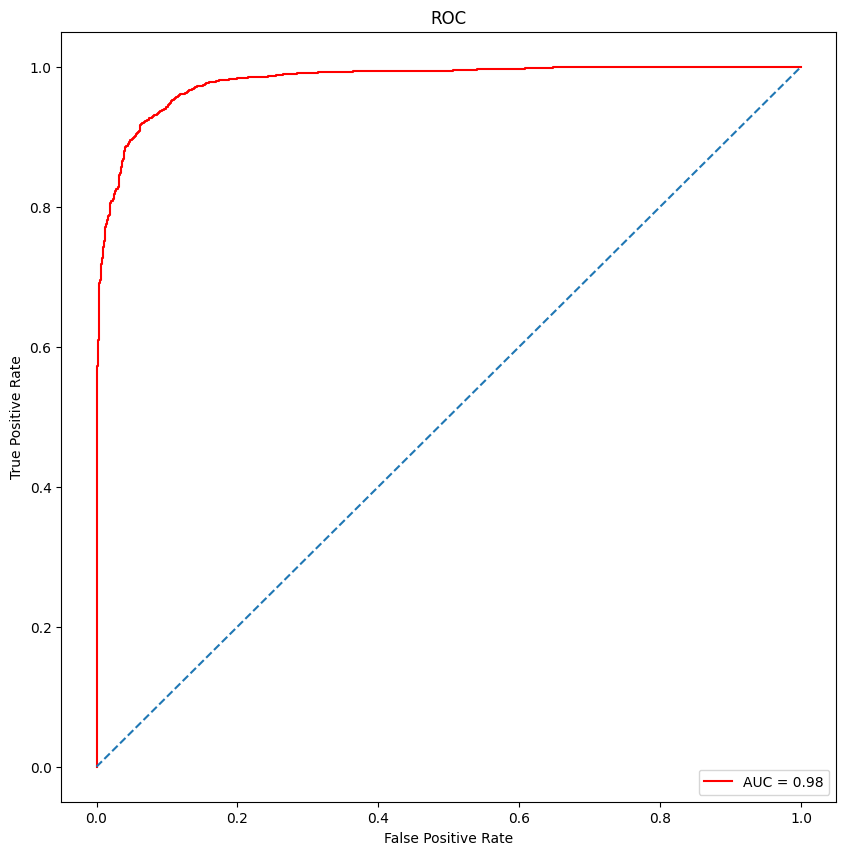

In [92]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Gaussian Naive Bayes

In [93]:
from sklearn.naive_bayes import GaussianNB
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred = gnb.predict(X_test)
print('Accuracy: ' , accuracy_score(y_test, y_pred))

Accuracy:  0.9067781533534958


In [94]:
y_pred_train = gnb.predict(X_train)
y_pred_train

array([ 1, -1,  1, ...,  1,  1,  1], dtype=int64)

In [95]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9056


In [96]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(gnb.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(gnb.score(X_test, y_test)))

Training set score: 0.9056
Test set score: 0.9068


In [97]:
# check class distribution in test set

y_test.value_counts()

label
 1    4050
-1    1571
Name: count, dtype: int64

In [98]:
# check null accuracy score
null_accuracy = (4050/(4050+1571))
print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.7205


In [99]:
predict_proba = pd.DataFrame(gnb.predict_proba(X_test), columns=['predict_proba_-1', 'predict_proba_1'])
predict_proba


,predict_proba_-1,predict_proba_1
0,0.704566,0.295434
1,0.445656,0.554344
2,0.932662,0.067338
3,0.720634,0.279366
4,0.045690,0.954310
...,...,...
5616,0.001856,0.998144
5617,0.757090,0.242910
5618,0.085332,0.914668
5619,0.028136,0.971864


In [100]:
# store the predicted probabilities

y_pred1 = gnb.predict_proba(X_test)[:, 1]

In [101]:
y_pred1

array([0.29543395, 0.55434397, 0.06733843, ..., 0.91466781, 0.97186419,
       0.99980882])

# Confusion Matrix

In [102]:
# View confusion matrix for test data and predictions
cm =confusion_matrix(y_test, y_pred)

The confusion matrix shows 1324 + 3773 = 5097 correct predictions and 247 + 277 = 524 incorrect predictions.

<Axes: >

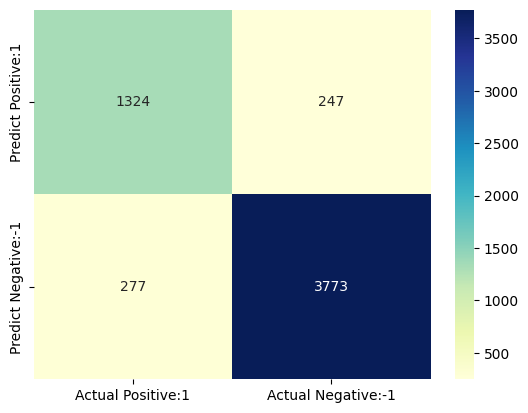

In [103]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:-1'], 
                                 index=['Predict Positive:1', 'Predict Negative:-1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [104]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.83      0.84      0.83      1571
           1       0.94      0.93      0.94      4050

    accuracy                           0.91      5621
   macro avg       0.88      0.89      0.88      5621
weighted avg       0.91      0.91      0.91      5621



In [105]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[-1,-1])

print('\nFalse Positives(FP) = ', cm[0,-1])

print('\nFalse Negatives(FN) = ', cm[-1,0])

Confusion matrix

 [[1324  247]
 [ 277 3773]]

True Positives(TP) =  1324

True Negatives(TN) =  3773

False Positives(FP) =  247

False Negatives(FN) =  277


In [106]:
TP = cm[0,0]
TN = cm[-1,-1]
FP = cm[0,-1]
FN = cm[-1,0]

In [107]:
# print classification accuracy

classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9068


In [108]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.8428


In [109]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.8270


In [110]:
auc = roc_auc_score(y_test, y_pred)
auc

0.8871901203133964

In [111]:
cm = confusion_matrix(y_test, y_pred)
predicted_probab_log = gnb.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

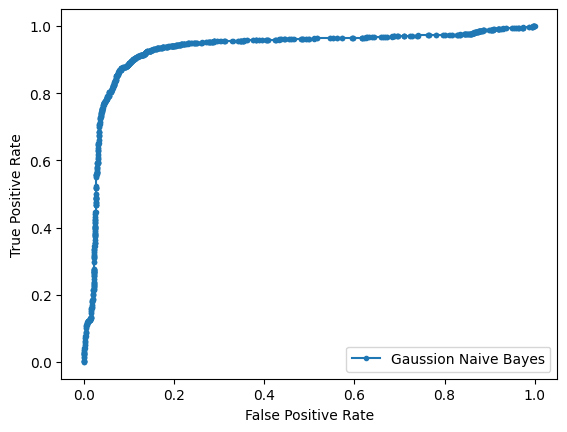

In [112]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='Gaussion Naive Bayes')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [113]:
gnb_model=GaussianNB()
gnb_model.fit(X_train,y_train)

GaussianNB()

In [114]:
y_prob = gnb_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, -1) # This will threshold the probabilities to give class predictions.
gnb_model.score(X_test, y_pred)

1.0

In [115]:
from sklearn import metrics

In [116]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.8871901203133964

In [117]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.9293665275714925

Text(0.5, 0, 'False Positive Rate')

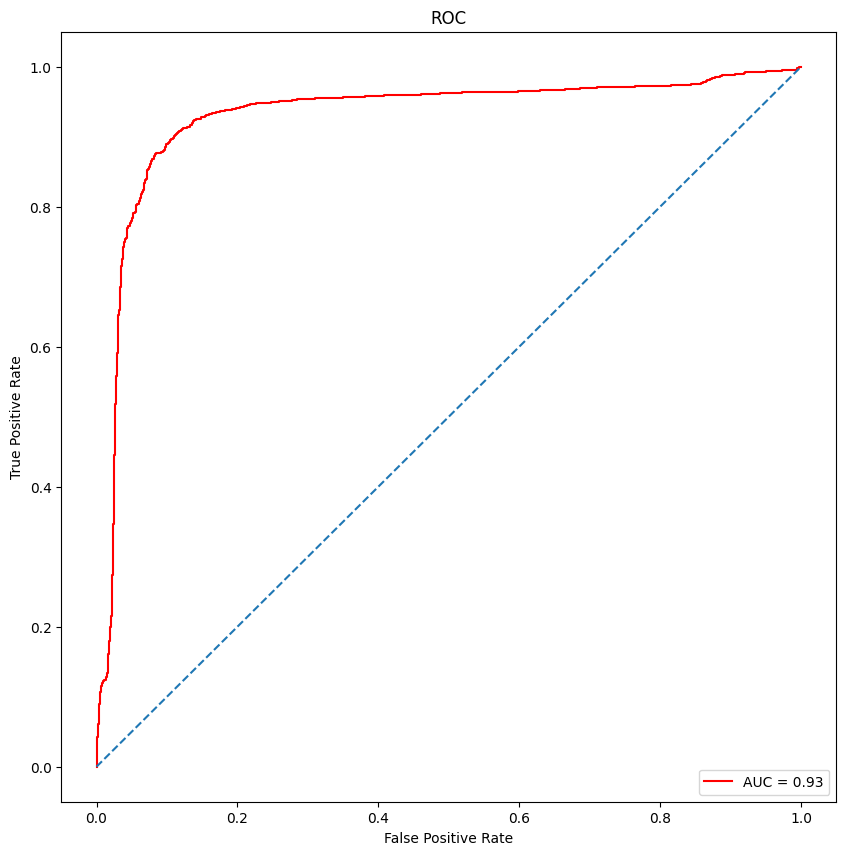

In [118]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

# Support Vector Machine Classification (SVC)

In [119]:
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score
svc=SVC(random_state = 22,probability = True) 
svc.fit(X_train, y_train)
y_pred=svc.predict(X_test)
print('Model accuracy : {0:0.3f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy : 0.964


In [120]:
y_prob = svc.predict_proba(X_test)[:,1]

In [121]:
y_pred_train = svc.predict(X_train)
y_pred_train

array([ 1, -1,  1, ...,  1,  1,  1], dtype=int64)

In [122]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9662


In [123]:
# print the scores on training and test set
print('Training set score: {:.4f}'.format(svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(svc.score(X_test, y_test)))

Training set score: 0.9662
Test set score: 0.9641


In [124]:
predict_proba = pd.DataFrame(svc.predict_proba(X_test), columns=['predict_proba_-1', 'predict_proba_1'])
predict_proba

,predict_proba_-1,predict_proba_1
0,0.938101,0.061899
1,0.083199,0.916801
2,0.991914,0.008086
3,0.996089,0.003911
4,0.216592,0.783408
...,...,...
5616,0.008025,0.991975
5617,0.952981,0.047019
5618,0.050488,0.949512
5619,0.004065,0.995935


# Confusion Matrix

In [125]:
# View confusion matrix for test data and predictions
cm =confusion_matrix(y_test, y_pred)

<Axes: >

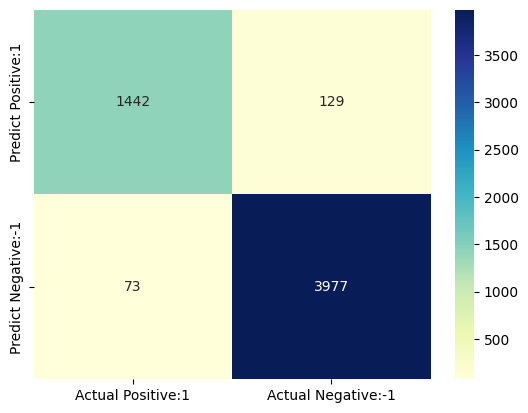

In [126]:
# visualize confusion matrix with seaborn heatmap

cm_matrix = pd.DataFrame(data=cm, columns=['Actual Positive:1', 'Actual Negative:-1'], 
                                 index=['Predict Positive:1', 'Predict Negative:-1'])

sns.heatmap(cm_matrix, annot=True, fmt='d', cmap='YlGnBu')

In [127]:
from sklearn.metrics import classification_report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

          -1       0.95      0.92      0.93      1571
           1       0.97      0.98      0.98      4050

    accuracy                           0.96      5621
   macro avg       0.96      0.95      0.95      5621
weighted avg       0.96      0.96      0.96      5621



In [128]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)

print('\nTrue Positives(TP) = ', cm[0,0])

print('\nTrue Negatives(TN) = ', cm[-1,-1])

print('\nFalse Positives(FP) = ', cm[0,-1])

print('\nFalse Negatives(FN) = ', cm[-1,0])

Confusion matrix

 [[1442  129]
 [  73 3977]]

True Positives(TP) =  1442

True Negatives(TN) =  3977

False Positives(FP) =  129

False Negatives(FN) =  73


In [129]:
TP = cm[0,0]
TN = cm[-1,-1]
FP = cm[0,-1]
FN = cm[-1,0]

In [130]:
classification_accuracy = (TP + TN) / float(TP + TN + FP + FN)

print('Classification accuracy : {0:0.4f}'.format(classification_accuracy))

Classification accuracy : 0.9641


In [131]:
# print precision score

precision = TP / float(TP + FP)
print('Precision : {0:0.4f}'.format(precision))

Precision : 0.9179


In [132]:
recall = TP / float(TP + FN)
print('Recall or Sensitivity : {0:0.4f}'.format(recall))

Recall or Sensitivity : 0.9518


In [133]:
auc = roc_auc_score(y_test, y_pred)
auc

0.9499310025068565

In [134]:
cm = confusion_matrix(y_test, y_pred)
predicted_probab_log = svc.predict_proba(X_test)
predicted_probab_log = predicted_probab_log[:, 1]
fpr, tpr, _ = roc_curve(y_test, predicted_probab_log)

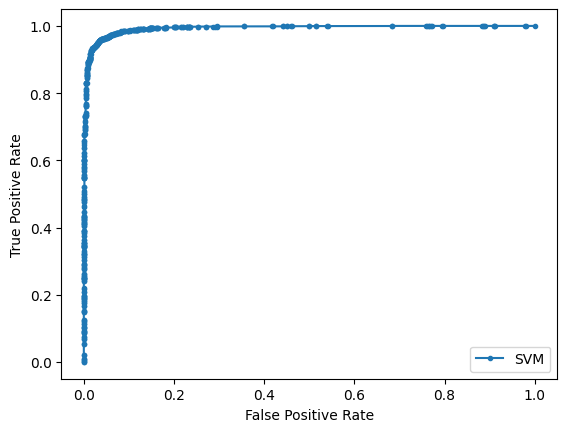

In [135]:
from matplotlib import pyplot
pyplot.plot(fpr, tpr, marker='.', label='SVM')
pyplot.xlabel('False Positive Rate')
pyplot.ylabel('True Positive Rate')
pyplot.legend()
pyplot.show()

In [136]:
svc_model=SVC(random_state = 22,probability = True)
svc_model.fit(X_train,y_train)

SVC(probability=True, random_state=22)

In [137]:
y_prob = svc_model.predict_proba(X_test)[:,1] # This will give you positive class prediction probabilities  
y_pred = np.where(y_prob > 0.5, 1, -1) # This will threshold the probabilities to give class predictions.
svc_model.score(X_test, y_pred)

0.9967977228251201

In [138]:
auc_roc=metrics.roc_auc_score(y_test,y_pred)
auc_roc

0.9516843089641731

In [139]:
from sklearn.metrics import roc_curve, auc
false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, y_prob)
roc_auc = auc(false_positive_rate, true_positive_rate)
roc_auc

0.99283989909706

Text(0.5, 0, 'False Positive Rate')

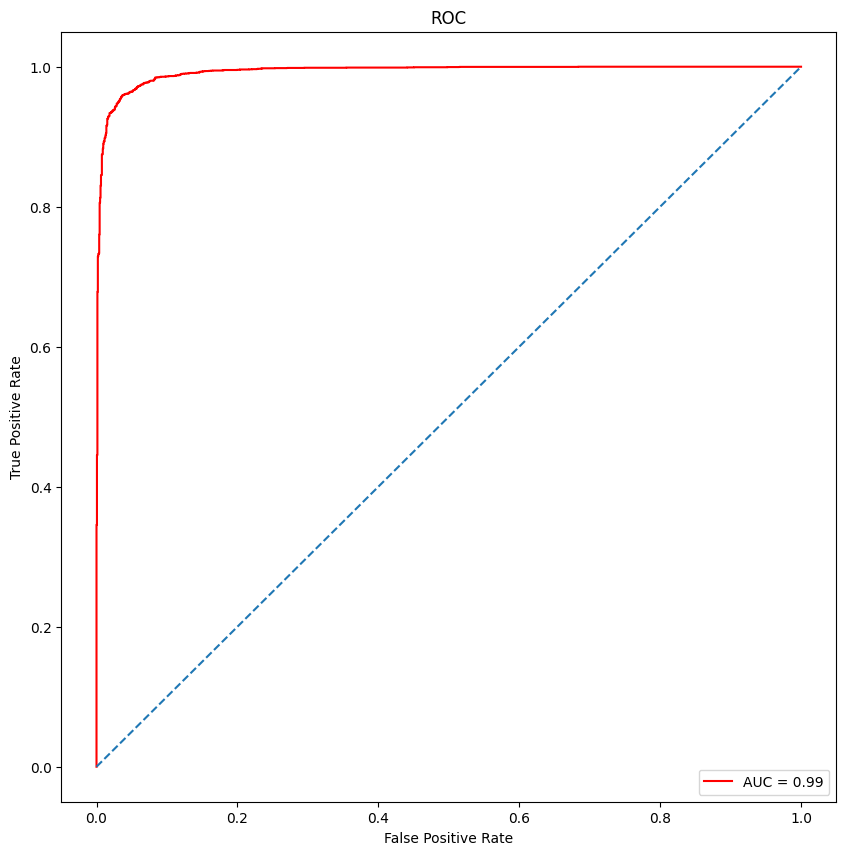

In [140]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
plt.title('ROC')
plt.plot(false_positive_rate,true_positive_rate, color='red',label = 'AUC = %0.2f' % roc_auc)
plt.legend(loc = 'lower right')
plt.plot([0, 1], [0, 1],linestyle='--')
plt.axis('tight')
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')

In [142]:
label.value_counts()

label
 1    20249
-1     7852
Name: count, dtype: int64